In [1]:
import numpy as np
import networkx as nx
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import time

In [2]:
# download and unzip graph from https://snap.stanford.edu/data/com-DBLP.html
path = "/home/koki/Desktop/Data/Graphs/com-dblp.ungraph.txt"
f = open(path, "r")
G = nx.Graph()
for line in f:
    if line[0] == "#":
        continue
    line = line.strip()
    line_split = line.split("\t")
    try:
        u = int(line_split[0])
        v = int(line_split[1])
        G.add_edge(u, v)
    except:
        raise ValueError("Line cannot be processed: ", line)

In [3]:
print("Number of nodes: {} \nNumber of edges: {} \nGraph density: {}".format(G.number_of_nodes(), \
                                                                    G.number_of_edges(), nx.density(G)))

Number of nodes: 317080 
Number of edges: 1049866 
Graph density: 2.08846661642591e-05


In [4]:
nodelist = sorted(list(G.nodes()))

In [9]:
# A = nx.to_scipy_sparse_matrix(G, nodelist=nodelist)

In [5]:
def sparsify_graph(G, p):
    G_sparse = nx.Graph()
    for u,v in G.edges():
        if np.random.random() <= p:
            G_sparse.add_edge(u,v)
    return G_sparse
        

In [6]:
def doulion(G, p):
    """
    Count the number of triangles.
    :param: G: networkx graph
    :param: p: sampling rate for edges. For exact count use p = 1
    """
    assert 0 < p <= 1
    A = nx.to_scipy_sparse_matrix(G)
    A2 = A.dot(A)
    A3 = A2.dot(A)
    nr_triangles = (1/p**3)*(A3.diagonal().sum()/6)
    return nr_triangles

In [7]:
p = 0.1
GS = sparsify_graph(G, p=p)

In [9]:
start = time.time()
exact = doulion(G, p=1)
print("Elapsed time exact: {:.2f} secs".format(time.time()-start))

Elapsed time exact: 13.79 secs


In [70]:
start = time.time()
est = doulion(GS, p=p)
print("Elapsed time Doulion: {:.2f} secs".format(time.time()-start))

Elapsed time Doulion: 1.19 secs


In [72]:
print("Approximation exact/estimated: {:.3f}".format(exact/est))

Approximation exact/estimated: 1.030


In [30]:
def nr_wedges(G):
    s = 0
    for u, d in nx.degree(G):
        s += (d*(d-1))//2
    return s

In [31]:
exact/(nr_wedges(G) - 2*exact)

0.12833889497296896

## Plotting

In [13]:
def plot_degrees(G, title):
    degree_freq = nx.degree_histogram(G)
    degrees = range(len(degree_freq))
    plt.figure(figsize=(5, 3)) 
    plt.loglog(degrees, degree_freq,'ro-', alpha=0.6, linewidth=0) 
    plt.xlabel('Degree', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title(title, fontsize=15)
    plt.show()

In [14]:
# download and unzip graph from https://snap.stanford.edu/data/email-EuAll.html
path = "/home/koki/Desktop/Data/Graphs/Email-EuAll.txt"
f = open(path, "r")
H = nx.Graph()
for line in f:
    if line[0] == "#":
        continue
    line = line.strip()
    line_split = line.split("\t")
    try:
        u = int(line_split[0])
        v = int(line_split[1])
        H.add_edge(u, v)
    except:
        raise ValueError("Line cannot be processed: ", line)

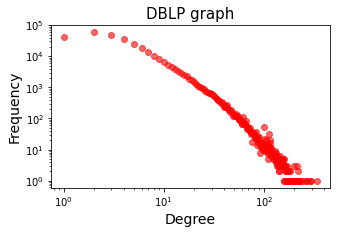

In [15]:
plot_degrees(G, title="DBLP graph")

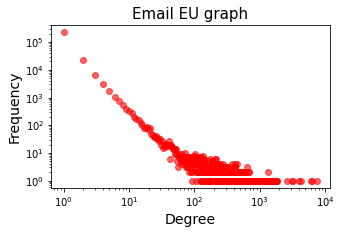

In [16]:
plot_degrees(H, title="Email EU graph")